<a href="https://www.kaggle.com/code/lalit7881/high-accuracy-travel-time-prediction-95-12?scriptVersionId=293961751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_target.csv
/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_features.csv


## Title:
Delhi Traffic Patterns & Congestion Analysis Dataset

##  Description:
The Delhi Traffic Dataset captures detailed traffic behavior across major roads and intersections in Delhi, reflecting real-world urban mobility conditions. It typically includes attributes such as traffic volume, vehicle count, average speed, congestion levels, time of day, day of week, weather conditions, and road or junction identifiers.

This dataset is designed to support in-depth analysis of traffic flow, peak-hour congestion, and bottleneck identification in a highly populated metropolitan city. It enables researchers and data scientists to study temporal patterns (rush hours, weekdays vs. weekends), spatial variations across different zones of Delhi, and the impact of external factors like weather or events on traffic intensity.

The dataset is well-suited for applications such as traffic prediction, congestion classification, route optimization, smart city planning, and machine learning model development. It can be used for exploratory data analysis, visualization, time-series forecasting, and building intelligent traffic management systems aimed at reducing delays, fuel consumption, and environmental impact.

## Import dataset

In [2]:
# Load feature and target datasets
features_df = pd.read_csv(
    "/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_features.csv"
)

target_df = pd.read_csv(
    "/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_target.csv"
)


In [3]:
features_df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3


In [4]:
target_df.head()

,Trip_ID,travel_time_minutes
0,TRIP_00001,15.3
1,TRIP_00002,3.0
2,TRIP_00003,92.7
3,TRIP_00004,10.6
4,TRIP_00005,42.0


In [5]:
print("Features Shape:", features_df.shape)
print("Target Shape:", target_df.shape)

Features Shape: (4000, 10)
Target Shape: (4000, 2)


In [6]:
print("Feature Columns:")
features_df.columns

Feature Columns:


Index(['Trip_ID', 'start_area', 'end_area', 'distance_km', 'time_of_day',
       'day_of_week', 'weather_condition', 'traffic_density_level',
       'road_type', 'average_speed_kmph'],
      dtype='object')

In [7]:
print("Target Columns:")
target_df.columns

Target Columns:


Index(['Trip_ID', 'travel_time_minutes'], dtype='object')

In [8]:
features_df.dtypes

Trip_ID                   object
start_area                object
end_area                  object
distance_km              float64
time_of_day               object
day_of_week               object
weather_condition         object
traffic_density_level     object
road_type                 object
average_speed_kmph       float64
dtype: object

In [9]:
target_df.dtypes

Trip_ID                 object
travel_time_minutes    float64
dtype: object

In [10]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
dtypes: float64(2), object(8)
memory usage: 312.6+ KB


In [11]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trip_ID              4000 non-null   object 
 1   travel_time_minutes  4000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.6+ KB


In [12]:
features_df.isnull().sum()

Trip_ID                  0
start_area               0
end_area                 0
distance_km              0
time_of_day              0
day_of_week              0
weather_condition        0
traffic_density_level    0
road_type                0
average_speed_kmph       0
dtype: int64

In [13]:
target_df.isnull().sum()

Trip_ID                0
travel_time_minutes    0
dtype: int64

In [14]:
features_df.duplicated().sum()

np.int64(0)

In [15]:
target_df.duplicated().sum()

np.int64(0)

In [16]:
features_df.describe()

,distance_km,average_speed_kmph
count,4000.000000,4000.000000
mean,13.342965,28.085300
std,6.367559,17.057224
min,1.510000,4.800000
25%,8.660000,14.500000
50%,13.170000,24.200000
75%,17.230000,38.200000
max,33.010000,93.300000


In [17]:
target_df.describe()

,travel_time_minutes
count,4000.000000
mean,40.155925
std,31.883265
min,2.100000
25%,18.400000
50%,30.300000
75%,52.100000
max,283.600000


In [18]:
features_df.nunique()

Trip_ID                  4000
start_area                 25
end_area                   25
distance_km               285
time_of_day                 4
day_of_week                 2
weather_condition           4
traffic_density_level       4
road_type                   3
average_speed_kmph        682
dtype: int64

In [19]:
features_df.iloc[:, 0].value_counts()

Trip_ID
TRIP_03984    1
TRIP_03983    1
TRIP_03982    1
TRIP_03981    1
TRIP_03980    1
             ..
TRIP_00005    1
TRIP_00004    1
TRIP_00003    1
TRIP_00002    1
TRIP_00001    1
Name: count, Length: 4000, dtype: int64

In [20]:
# Combine datasets column-wise
traffic_df = pd.concat([features_df, target_df], axis=1)

traffic_df.head()


,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,Trip_ID,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,TRIP_00001,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,TRIP_00002,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,TRIP_00003,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,TRIP_00004,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,TRIP_00005,42.0


In [21]:
traffic_df.shape

(4000, 12)

In [22]:
traffic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
 10  Trip_ID                4000 non-null   object 
 11  travel_time_minutes    4000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 375.1+ KB


In [23]:
traffic_df.memory_usage(deep=True)

Index                       132
Trip_ID                  236000
start_area               236069
end_area                 236038
distance_km               32000
time_of_day              238057
day_of_week              224000
weather_condition        216403
traffic_density_level    218387
road_type                229887
average_speed_kmph        32000
Trip_ID                  236000
travel_time_minutes       32000
dtype: int64

In [24]:
traffic_df.columns

Index(['Trip_ID', 'start_area', 'end_area', 'distance_km', 'time_of_day',
       'day_of_week', 'weather_condition', 'traffic_density_level',
       'road_type', 'average_speed_kmph', 'Trip_ID', 'travel_time_minutes'],
      dtype='object')

## Data visualizations

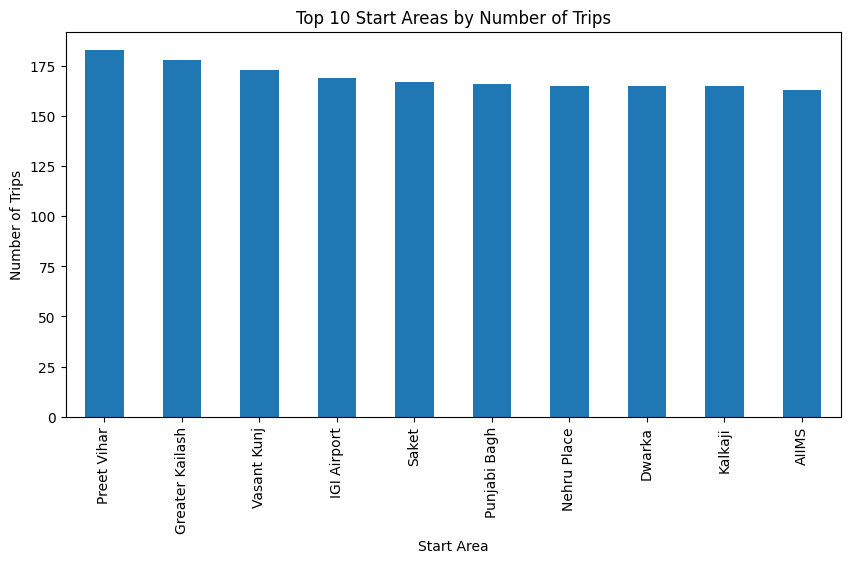

In [25]:
plt.figure(figsize=(10,5))
traffic_df['start_area'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Start Areas by Number of Trips")
plt.xlabel("Start Area")
plt.ylabel("Number of Trips")
plt.show()


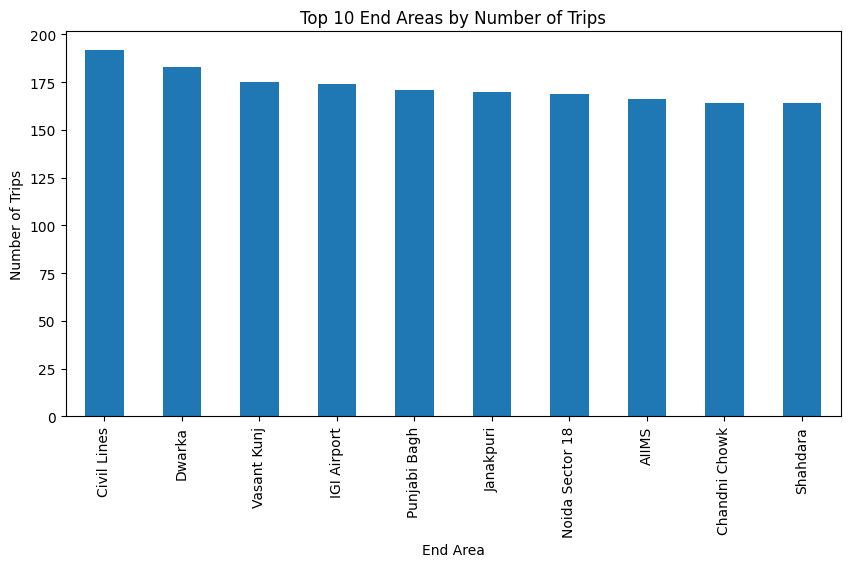

In [26]:
plt.figure(figsize=(10,5))
traffic_df['end_area'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 End Areas by Number of Trips")
plt.xlabel("End Area")
plt.ylabel("Number of Trips")
plt.show()


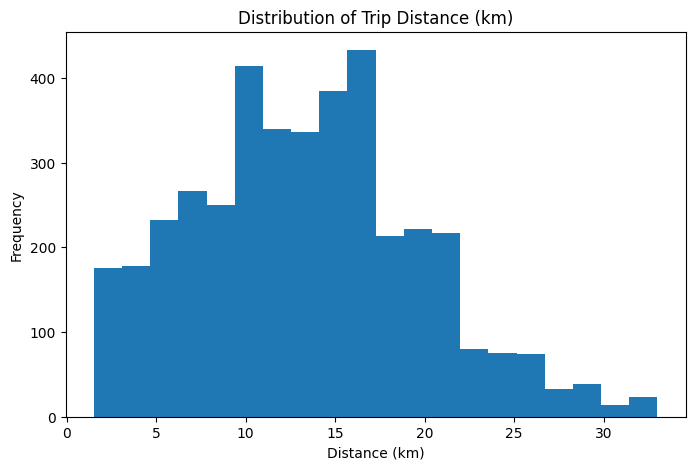

In [27]:
plt.figure(figsize=(8,5))
plt.hist(traffic_df['distance_km'], bins=20)
plt.title("Distribution of Trip Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()


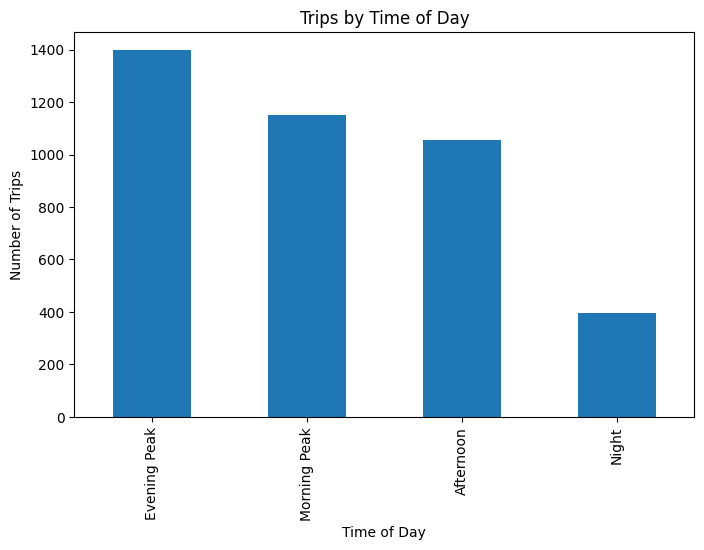

In [28]:
plt.figure(figsize=(8,5))
traffic_df['time_of_day'].value_counts().plot(kind='bar')
plt.title("Trips by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Trips")
plt.show()


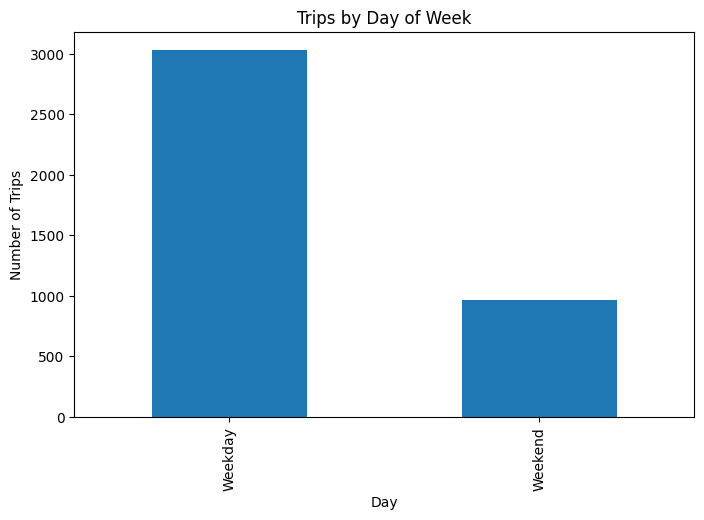

In [29]:
plt.figure(figsize=(8,5))
traffic_df['day_of_week'].value_counts().plot(kind='bar')
plt.title("Trips by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.show()


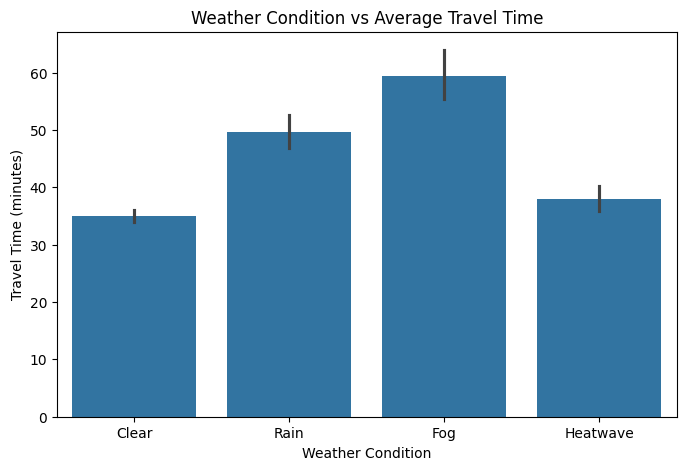

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='weather_condition', y='travel_time_minutes', data=traffic_df)
plt.title("Weather Condition vs Average Travel Time")
plt.xlabel("Weather Condition")
plt.ylabel("Travel Time (minutes)")
plt.show()


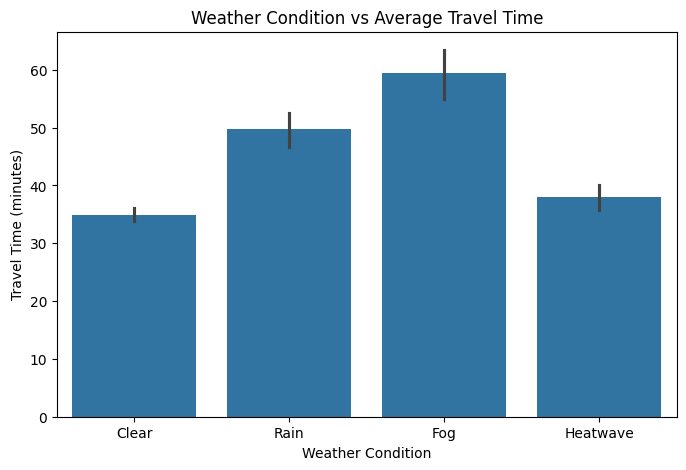

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='weather_condition', y='travel_time_minutes', data=traffic_df)
plt.title("Weather Condition vs Average Travel Time")
plt.xlabel("Weather Condition")
plt.ylabel("Travel Time (minutes)")
plt.show()


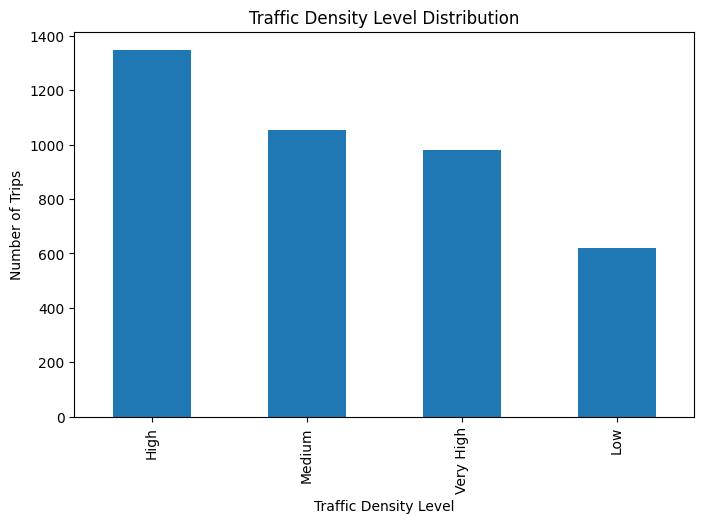

In [32]:
plt.figure(figsize=(8,5))
traffic_df['traffic_density_level'].value_counts().plot(kind='bar')
plt.title("Traffic Density Level Distribution")
plt.xlabel("Traffic Density Level")
plt.ylabel("Number of Trips")
plt.show()


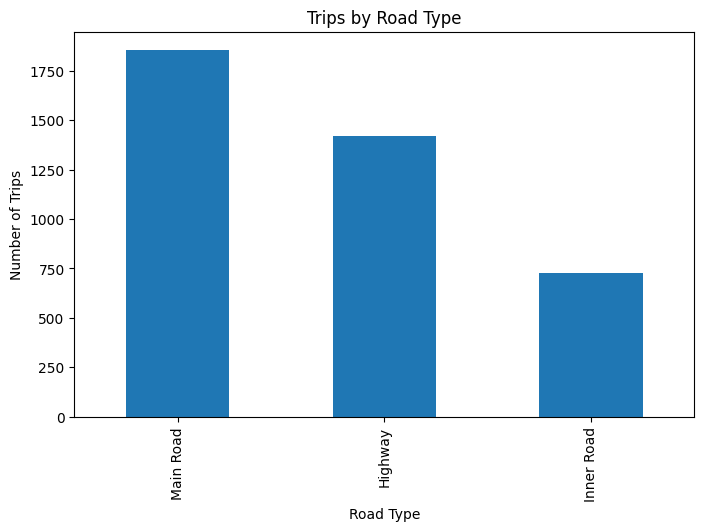

In [33]:
plt.figure(figsize=(8,5))
traffic_df['road_type'].value_counts().plot(kind='bar')
plt.title("Trips by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Trips")
plt.show()


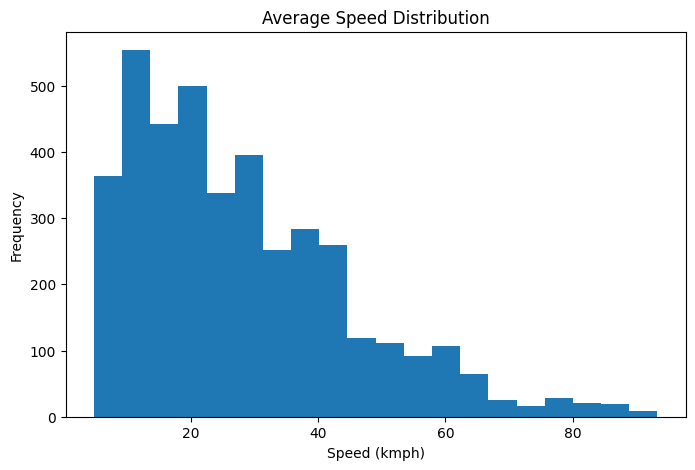

In [34]:
plt.figure(figsize=(8,5))
plt.hist(traffic_df['average_speed_kmph'], bins=20)
plt.title("Average Speed Distribution")
plt.xlabel("Speed (kmph)")
plt.ylabel("Frequency")
plt.show()


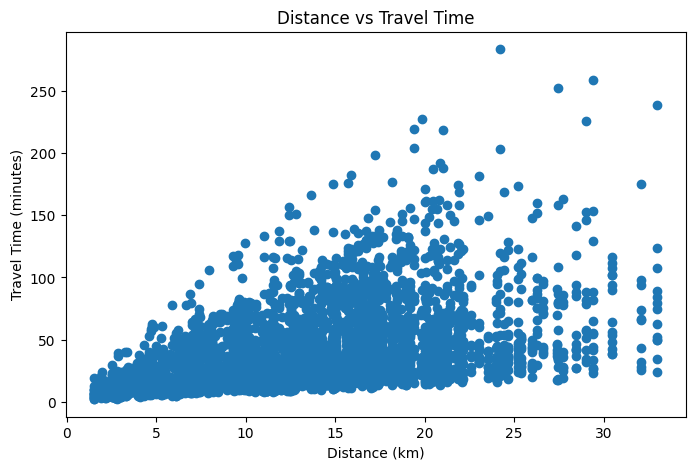

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(traffic_df['distance_km'], traffic_df['travel_time_minutes'])
plt.title("Distance vs Travel Time")
plt.xlabel("Distance (km)")
plt.ylabel("Travel Time (minutes)")
plt.show()


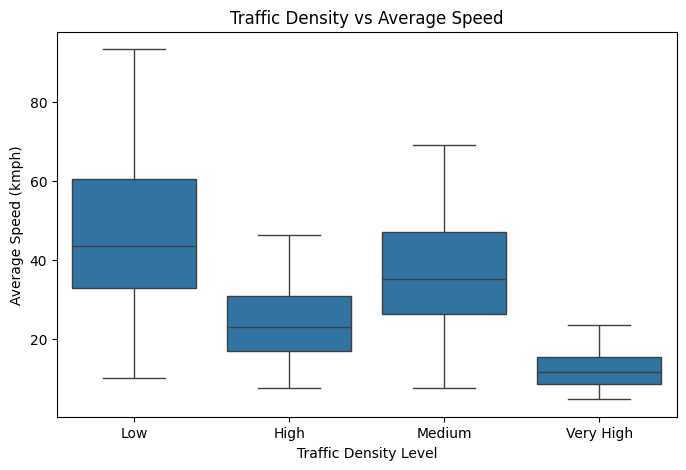

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='traffic_density_level', y='average_speed_kmph', data=traffic_df)
plt.title("Traffic Density vs Average Speed")
plt.xlabel("Traffic Density Level")
plt.ylabel("Average Speed (kmph)")
plt.show()


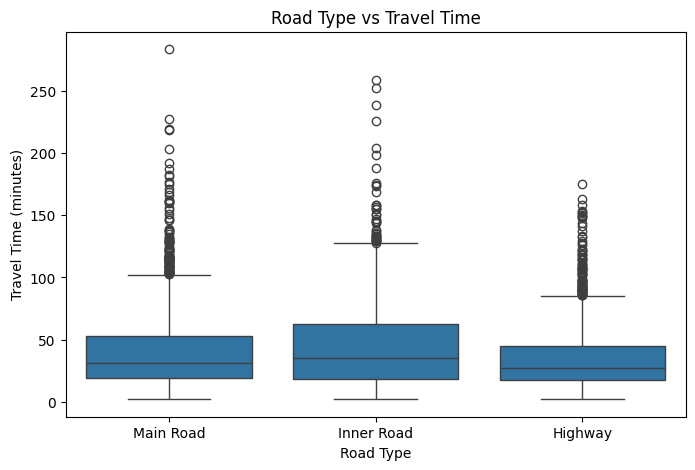

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='road_type', y='travel_time_minutes', data=traffic_df)
plt.title("Road Type vs Travel Time")
plt.xlabel("Road Type")
plt.ylabel("Travel Time (minutes)")
plt.show()


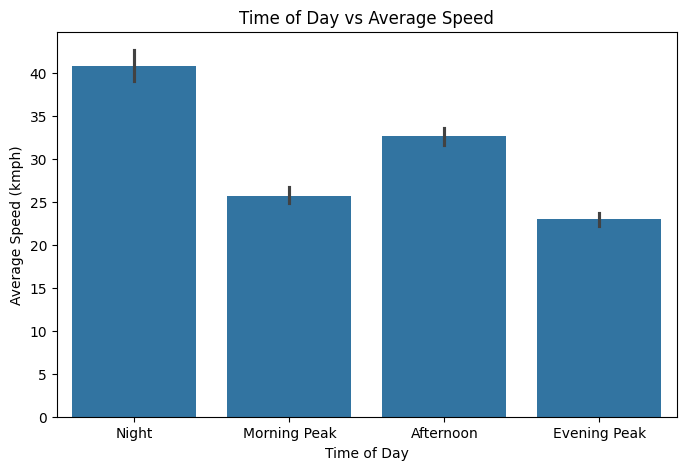

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='time_of_day', y='average_speed_kmph', data=traffic_df)
plt.title("Time of Day vs Average Speed")
plt.xlabel("Time of Day")
plt.ylabel("Average Speed (kmph)")
plt.show()


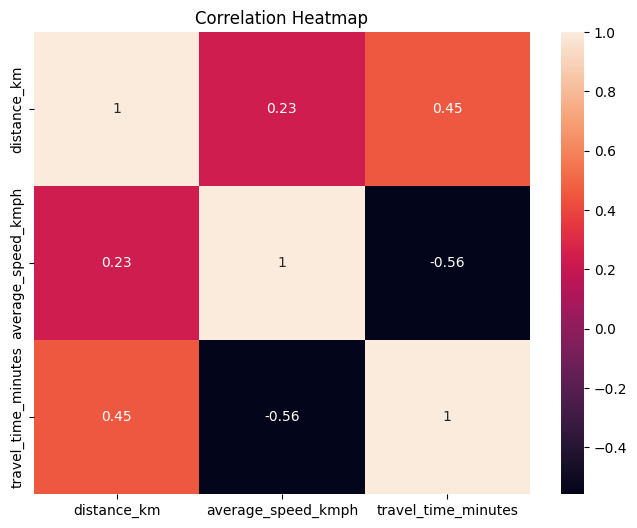

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(
    traffic_df[['distance_km','average_speed_kmph','travel_time_minutes']].corr(),
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()


## ML algorithms

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [41]:
features_df = pd.read_csv("/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_features.csv")
target_df = pd.read_csv("/kaggle/input/delhi-traffic-travel-time-prediction-dataset/delhi_traffic_target.csv")

df = pd.concat([features_df, target_df], axis=1)

# Remove duplicate Trip_ID column
df = df.loc[:, ~df.columns.duplicated()]


In [42]:
X = df.drop(columns=['travel_time_minutes', 'Trip_ID'])
y = df['travel_time_minutes']


In [43]:
y = pd.cut(
    y,
    bins=[0, 20, 40, 60, 100],
    labels=['Very Short', 'Short', 'Medium', 'Long']
)


In [44]:
le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [46]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}


In [47]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = acc


In [48]:
accuracy_df = pd.DataFrame(
    list(accuracy_results.items()),
    columns=['Model', 'Accuracy (%)']
)

accuracy_df


,Model,Accuracy (%)
0,Logistic Regression,95.125
1,Decision Tree,91.000
2,Random Forest,91.250
3,KNN,82.125
4,Naive Bayes,57.750
5,SVM,92.750


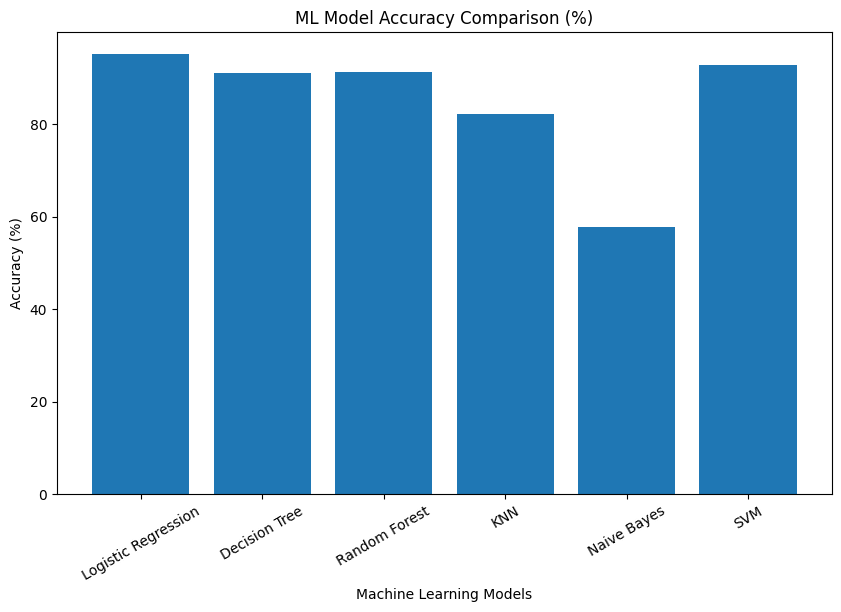

In [49]:
plt.figure(figsize=(10,6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy (%)'])
plt.title("ML Model Accuracy Comparison (%)")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=30)
plt.show()
